# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [7]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [9]:
x_train[0].shape

(28, 28)

Check the sample train data

In [10]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [11]:

y_train[333]

8

Check the actual image

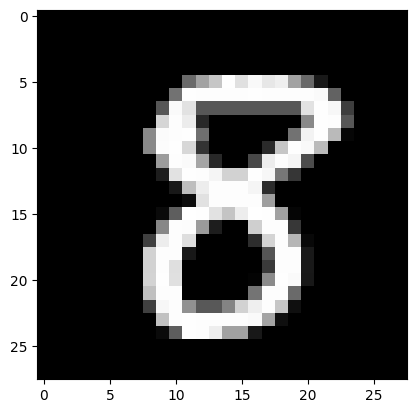

In [12]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [13]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [14]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [15]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [16]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [18]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30



469/469 [==============================] - 6s 10ms/step - loss: 0.2547 - accuracy: 0.9203 - val_loss: 0.1176 - val_accuracy: 0.9626
Epoch 2/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1052 - accuracy: 0.9681 - val_loss: 0.0800 - val_accuracy: 0.9758
Epoch 3/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0744 - accuracy: 0.9769 - val_loss: 0.0720 - val_accuracy: 0.9781
Epoch 4/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0584 - accuracy: 0.9819 - val_loss: 0.0673 - val_accuracy: 0.9793
Epoch 5/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0625 - val_accuracy: 0.9824
Epoch 6/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0590 - val_accuracy: 0.9831
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0775 - val_accuracy: 0.9804
Epoch 8/30

Use Keras evaluate function to evaluate performance on the test set

In [19]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08155260980129242
Test accuracy: 0.9854000210762024


Interpret the result

#type your answer here

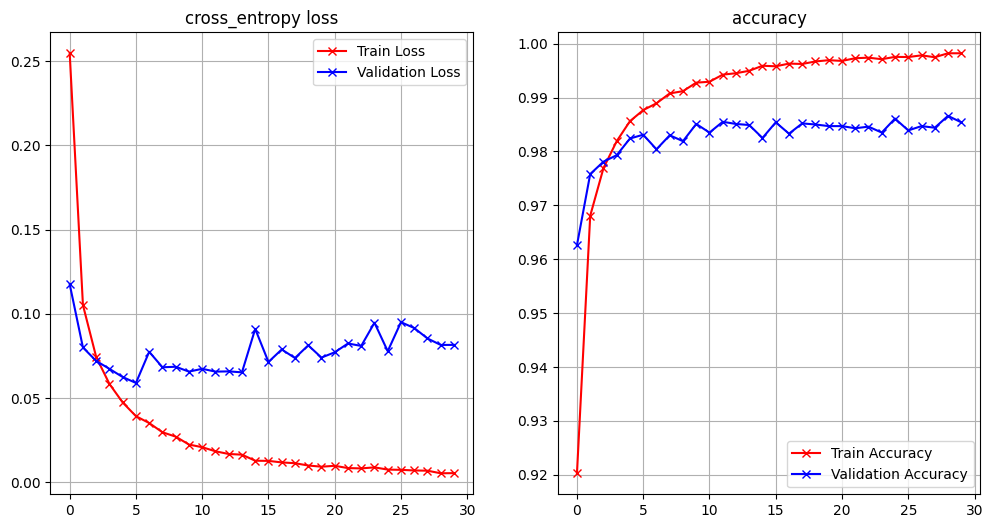

In [20]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

#type your answer here

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [125]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 31s 0us/step


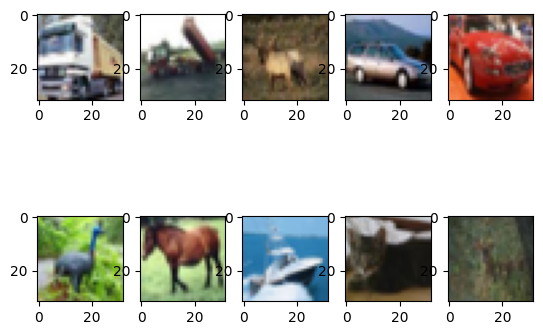

In [126]:
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [127]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) test samples


In [129]:
x_train = x_train.reshape(len(x_train), 32 * 32 * 3)
x_test = x_test.reshape(len(x_test), 32 * 32 * 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [130]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [135]:
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(3072,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

In [136]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 400)               1229200   
                                                                 
 dropout_24 (Dropout)        (None, 400)               0         
                                                                 
 dense_37 (Dense)            (None, 300)               120300    
                                                                 
 dropout_25 (Dropout)        (None, 300)               0         
                                                                 
 dense_38 (Dense)            (None, 10)                3010      
                                                                 
Total params: 1352510 (5.16 MB)
Trainable params: 1352510 (5.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history_model1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
391/391 [==============================] - 11s 22ms/step - loss: 2.0953 - accuracy: 0.2444 - val_loss: 1.8534 - val_accuracy: 0.3310
Epoch 2/20
391/391 [==============================] - 7s 18ms/step - loss: 1.8789 - accuracy: 0.3197 - val_loss: 1.7606 - val_accuracy: 0.3741
Epoch 3/20
391/391 [==============================] - 7s 17ms/step - loss: 1.8213 - accuracy: 0.3448 - val_loss: 1.7875 - val_accuracy: 0.3472
Epoch 4/20
391/391 [==============================] - 7s 18ms/step - loss: 1.7777 - accuracy: 0.3596 - val_loss: 1.7367 - val_accuracy: 0.3912
Epoch 5/20
391/391 [==============================] - 6s 16ms/step - loss: 1.7445 - accuracy: 0.3731 - val_loss: 1.7134 - val_accuracy: 0.3958
Epoch 6/20
391/391 [==============================] - 6s 16ms/step - loss: 1.7225 - accuracy: 0.3815 - val_loss: 1.6173 - val_accuracy: 0.4280
Epoch 7/20
391/391 [==============================] - 7s 19ms/step - loss: 1.7004 - accuracy: 0.3896 - val_loss: 1.6339 - val_accuracy: 0.418

In [138]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.556646704673767
Test accuracy: 0.4544000029563904


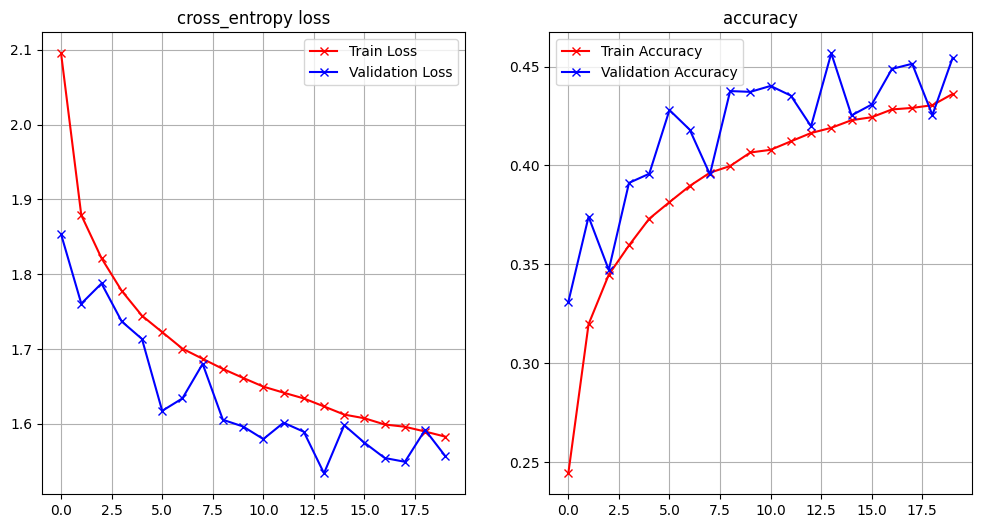

In [139]:
plot_loss_accuracy(history_model1)

In [143]:
model_2 = Sequential()
model_2.add(Dense(200, activation='relu', input_shape=(3072,)))
model_2.add(Dropout(0.7))
model_2.add(Dense(300, activation='relu'))
model_2.add(Dropout(0.7))
model_2.add(Dense(10, activation='softmax'))

In [144]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 200)               614600    
                                                                 
 dropout_28 (Dropout)        (None, 200)               0         
                                                                 
 dense_43 (Dense)            (None, 300)               60300     
                                                                 
 dropout_29 (Dropout)        (None, 300)               0         
                                                                 
 dense_44 (Dense)            (None, 10)                3010      
                                                                 
Total params: 677910 (2.59 MB)
Trainable params: 677910 (2.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [145]:
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 250  # mini-batch with 250 examples
epochs = 30 #140
history_model2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
200/200 [==============================] - 4s 14ms/step - loss: 2.3439 - accuracy: 0.0983 - val_loss: 2.3023 - val_accuracy: 0.1014
Epoch 2/30
200/200 [==============================] - 2s 11ms/step - loss: 2.2959 - accuracy: 0.1114 - val_loss: 2.2477 - val_accuracy: 0.1416
Epoch 3/30
200/200 [==============================] - 2s 11ms/step - loss: 2.2727 - accuracy: 0.1317 - val_loss: 2.2100 - val_accuracy: 0.1693
Epoch 4/30
200/200 [==============================] - 2s 10ms/step - loss: 2.2535 - accuracy: 0.1348 - val_loss: 2.1940 - val_accuracy: 0.1746
Epoch 5/30
200/200 [==============================] - 2s 10ms/step - loss: 2.2373 - accuracy: 0.1423 - val_loss: 2.1795 - val_accuracy: 0.1769
Epoch 6/30
200/200 [==============================] - 2s 10ms/step - loss: 2.2168 - accuracy: 0.1523 - val_loss: 2.1819 - val_accuracy: 0.1776
Epoch 7/30
200/200 [==============================] - 2s 11ms/step - loss: 2.2014 - accuracy: 0.1555 - val_loss: 2.1740 - val_accuracy: 0.1949

In [146]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.137629747390747
Test accuracy: 0.18320000171661377


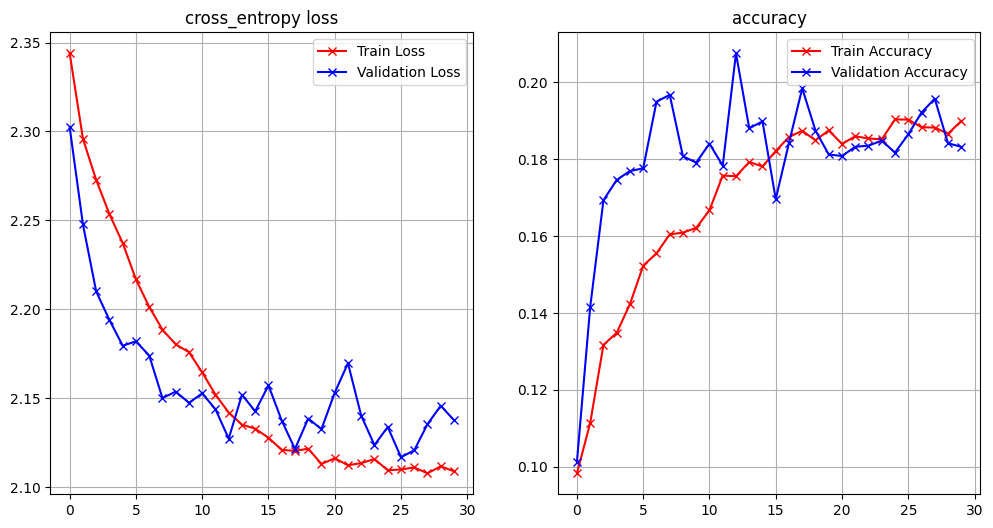

In [147]:
plot_loss_accuracy(history_model2)

#### Conclusion

#type your answer here